In [81]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
data=pd.read_csv('Data/medical_insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [83]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

#make a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age','bmi','children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex','smoker','region'])
)

In [84]:

#creating features and labels
X=data.drop('charges', axis=1)
y=data['charges']
X.head(), y.head()

(   age     sex     bmi  children smoker     region
 0   19  female  27.900         0    yes  southwest
 1   18    male  33.770         1     no  southeast
 2   28    male  33.000         3     no  southeast
 3   33    male  22.705         0     no  northwest
 4   32    male  28.880         0     no  northwest,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 Name: charges, dtype: float64)

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [86]:
len(X),len(X_train),len(X_test)

(1338, 936, 402)

In [87]:
len(y),len(y_train),len(y_test)

(1338, 936, 402)

In [88]:
#fitting the column transformer to our training data
ct.fit(X_train)

#transforming both train and test data
X_train_encoded=ct.transform(X_train)
X_test_encoded=ct.transform(X_test)

In [89]:
#create a model
tf.random.set_seed(100)
model_1=tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(10))
model_1.add(tf.keras.layers.Dense(1))

In [90]:
#compile the model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [91]:
#fit the model
model_1.fit(X_train_encoded,y_train,epochs=1000)

Epoch 1/1000
30/30 [==============================] - 3s 10ms/step - loss: 13168.1934 - mae: 13168.1934
Epoch 2/1000
30/30 [==============================] - 0s 8ms/step - loss: 13164.6777 - mae: 13164.6777
Epoch 3/1000
30/30 [==============================] - 0s 13ms/step - loss: 13156.6689 - mae: 13156.6689
Epoch 4/1000
30/30 [==============================] - 0s 9ms/step - loss: 13135.6963 - mae: 13135.6963
Epoch 5/1000
30/30 [==============================] - 0s 8ms/step - loss: 13079.0732 - mae: 13079.0732
Epoch 6/1000
30/30 [==============================] - 0s 8ms/step - loss: 12924.7812 - mae: 12924.7812
Epoch 7/1000
30/30 [==============================] - 0s 9ms/step - loss: 12503.4326 - mae: 12503.4326
Epoch 8/1000
30/30 [==============================] - 0s 8ms/step - loss: 11427.4863 - mae: 11427.4863
Epoch 9/1000
30/30 [==============================] - 0s 8ms/step - loss: 9861.0723 - mae: 9861.0723
Epoch 10/1000
30/30 [==============================] - 0s 8ms/step - loss

In [92]:
model_1.evaluate(X_test_encoded,y_test)

13/13 [==============================] - 1s 10ms/step - loss: 3420.8254 - mae: 3420.8254


[3420.825439453125, 3420.825439453125]

In [93]:
y_pred_1=model_1.predict(X_test_encoded)
y_pred_1

13/13 [==============================] - 0s 4ms/step


array([[ 1958.925  ],
       [ 4408.383  ],
       [ 8180.2812 ],
       [ 1647.409  ],
       [32651.984  ],
       [45136.098  ],
       [12715.62   ],
       [ 2723.4883 ],
       [37005.89   ],
       [12489.1455 ],
       [ 9183.503  ],
       [ 3406.0273 ],
       [ 9154.019  ],
       [ 3109.2488 ],
       [ 8039.151  ],
       [36527.566  ],
       [10609.765  ],
       [11335.725  ],
       [ 5410.889  ],
       [11721.707  ],
       [10576.332  ],
       [ 1322.9531 ],
       [ 7709.838  ],
       [39793.3    ],
       [11151.84   ],
       [37448.406  ],
       [ 4059.7588 ],
       [45306.598  ],
       [40215.543  ],
       [12676.915  ],
       [12662.788  ],
       [ 2259.319  ],
       [44791.45   ],
       [32867.21   ],
       [ 7124.5254 ],
       [12882.076  ],
       [ 4413.3916 ],
       [38374.996  ],
       [ 4259.8696 ],
       [45223.152  ],
       [ 8159.264  ],
       [ 8889.173  ],
       [ 3037.9304 ],
       [ 5547.64   ],
       [ 1610.0502 ],
       [ 4

In [94]:
tf.metrics.MAE(y_test,y_pred_1)

<tf.Tensor: shape=(402,), dtype=float32, numpy=
array([11588.909 ,  9842.4   ,  8456.818 , 11873.863 , 21126.756 ,
       31892.145 ,  8734.145 , 10966.149 , 24605.06  ,  8671.971 ,
        8344.153 , 10480.478 ,  8345.906 , 10686.568 ,  8481.518 ,
       24211.564 ,  8362.338 ,  8436.541 ,  9331.251 ,  8501.631 ,
        8360.01  , 12186.355 ,  8545.611 , 26980.574 ,  8413.078 ,
       24971.406 , 10054.294 , 32052.465 , 27359.365 ,  8722.976 ,
        8718.898 , 11333.571 , 31569.154 , 21292.053 ,  8692.817 ,
        8782.438 ,  9839.461 , 25751.29  ,  9931.211 , 31974.006 ,
        8460.374 ,  8365.77  , 10737.347 ,  9271.379 , 11909.333 ,
        9661.024 ,  9418.08  , 11650.133 , 11917.072 ,  8731.281 ,
        8756.057 ,  8384.694 , 10190.343 ,  8440.876 ,  8565.69  ,
        8489.147 ,  8344.946 , 24630.936 ,  8750.158 ,  8348.74  ,
       11131.115 , 10880.017 ,  9737.875 ,  8355.045 ,  8492.979 ,
       11017.669 , 11870.881 ,  9048.293 ,  9245.023 , 26956.467 ,
        8330.4

In [95]:
#building another model
model_2=tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(100))
model_2.add(tf.keras.layers.Dense(10))
model_2.add(tf.keras.layers.Dense(1))

In [96]:
#compiling the second model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
                metrics=['mae'])

In [97]:
#fitting the model
model_2.fit(X_train_encoded,y_train,epochs=500)

Epoch 1/500
30/30 [==============================] - 3s 9ms/step - loss: 13168.5586 - mae: 13168.5586
Epoch 2/500
30/30 [==============================] - 0s 8ms/step - loss: 13167.2500 - mae: 13167.2500
Epoch 3/500
30/30 [==============================] - 0s 7ms/step - loss: 13165.5947 - mae: 13165.5947
Epoch 4/500
30/30 [==============================] - 0s 10ms/step - loss: 13163.3174 - mae: 13163.3174
Epoch 5/500
30/30 [==============================] - 0s 8ms/step - loss: 13160.1582 - mae: 13160.1582
Epoch 6/500
30/30 [==============================] - 0s 10ms/step - loss: 13155.8926 - mae: 13155.8926
Epoch 7/500
30/30 [==============================] - 0s 9ms/step - loss: 13150.2939 - mae: 13150.2939
Epoch 8/500
30/30 [==============================] - 0s 8ms/step - loss: 13143.1172 - mae: 13143.1172
Epoch 9/500
30/30 [==============================] - 0s 7ms/step - loss: 13134.1797 - mae: 13134.1797
Epoch 10/500
30/30 [==============================] - 0s 9ms/step - loss: 13123.

In [98]:
model_2.evaluate(X_test_encoded,y_test)

13/13 [==============================] - 0s 3ms/step - loss: 3402.1943 - mae: 3402.1943


[3402.1943359375, 3402.1943359375]

In [99]:
y_pred_2=model_2.predict(X_test_encoded)
y_pred_2

13/13 [==============================] - 0s 2ms/step


array([[ 1825.1443 ],
       [ 4178.067  ],
       [ 8076.9604 ],
       [ 1470.3951 ],
       [25224.533  ],
       [37960.73   ],
       [12821.557  ],
       [ 2488.3372 ],
       [29799.104  ],
       [12656.154  ],
       [ 9376.353  ],
       [ 3266.1658 ],
       [ 9145.746  ],
       [ 2937.4211 ],
       [ 8035.6587 ],
       [29281.938  ],
       [10675.544  ],
       [11272.093  ],
       [ 5337.3564 ],
       [12005.694  ],
       [10776.096  ],
       [ 1155.6252 ],
       [ 7663.1045 ],
       [32528.387  ],
       [11144.815  ],
       [30100.32   ],
       [ 3937.6416 ],
       [38163.926  ],
       [32907.598  ],
       [12792.446  ],
       [12788.315  ],
       [ 1955.2335 ],
       [37636.633  ],
       [25477.877  ],
       [ 7080.179  ],
       [12962.998  ],
       [ 4433.673  ],
       [31133.201  ],
       [ 4094.1042 ],
       [38147.965  ],
       [ 8037.138  ],
       [ 8812.721  ],
       [ 3009.8281 ],
       [ 5473.22   ],
       [ 1270.0623 ],
       [ 4

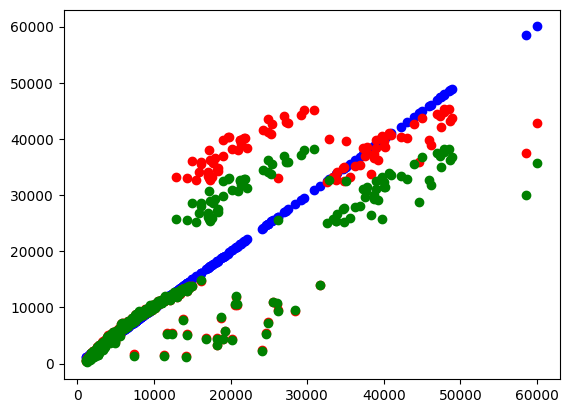

In [100]:
plt.scatter(y_test,y_test, c='b')
plt.scatter(y_test,y_pred_1, c='r')
plt.scatter(y_test,y_pred_2, c='g')